https://github.com/Miraj073/Traditional-Bengali-Food-Classification/blob/main/Transfer_learning_of_TBFC.ipynb

In [56]:
import shutil
shutil.rmtree('/kaggle/working/', ignore_errors=True)


# **Test 1: VGG16 Fine tuned lr=1e-5**

In [36]:
import scipy
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


Model Build

In [57]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer_5 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [58]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [59]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
#model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
#model.add(Dropout(0.5))
model.add(Dense(21,activation='softmax'))

This is for splitting the data

In [60]:

# Set paths
original_dataset_dir = "/kaggle/input/tbfc-21/TBFC_21"  # Modify this to your dataset path
base_dir = "/kaggle/working/splitted_dataset"  # Temporary split dataset directory

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to split dataset
def split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8):
    """
    Splits the dataset into train and validation sets.
    :param original_dataset_dir: Path to the original dataset
    :param train_dir: Path to save training images
    :param validation_dir: Path to save validation images
    :param split_ratio: Percentage of images used for training
    """
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Iterate over each class (sub-folder)
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, test_images = train_test_split(images, train_size=split_ratio, random_state=42)

            # Create class directories
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Move images to train and validation folders
            for img in train_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
            for img in test_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Split the dataset
split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8)


Data Augmenting

In [61]:
# Custom function to add Gaussian noise
def add_gaussian_noise(img, mean=0, std=0.1):
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = np.clip(img + noise, 0, 1)  # Clip to ensure pixel values remain in [0, 1]
    return noisy_img

# Custom DataGenerator with Gaussian noise
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, generator, add_noise=False, multiply_times=3):
        self.generator = generator
        self.add_noise = add_noise
        self.multiply_times = multiply_times

    def __len__(self):
        return len(self.generator) * self.multiply_times

    def __getitem__(self, idx):
        batch_x, batch_y = self.generator[idx % len(self.generator)]
        if self.add_noise:
            batch_x = np.array([add_gaussian_noise(img) for img in batch_x])
        return batch_x, batch_y

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40
)

# Augmentation for validation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from newly created train/validation directories
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Wrap the train_generator with CustomDataGenerator to add Gaussian noise and multiply data
augmented_train_generator = CustomDataGenerator(
    generator=train_generator,
    add_noise=True,
    multiply_times=2  # Increase training data twofold
)

Found 10800 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


Plotting images

['doi', 'dimvuna', 'bakorkhani', 'fuchka', 'chicken kosha', 'daab chingri', 'jilapi', 'daab chingri', 'misti_roshogolla', 'jilapi', 'Shorshe ilish', 'Haleem', 'Haleem', 'biriyani', 'dimvuna', 'misti_roshogolla', 'samosa', 'khichuri', 'samosa', 'misti_roshogolla', 'samosa', 'daab chingri', 'piyaju', 'doi', 'jilapi', 'kalavuna', 'Haleem', 'piyaju', 'khichuri', 'dimvuna', 'achar', 'dimvuna']


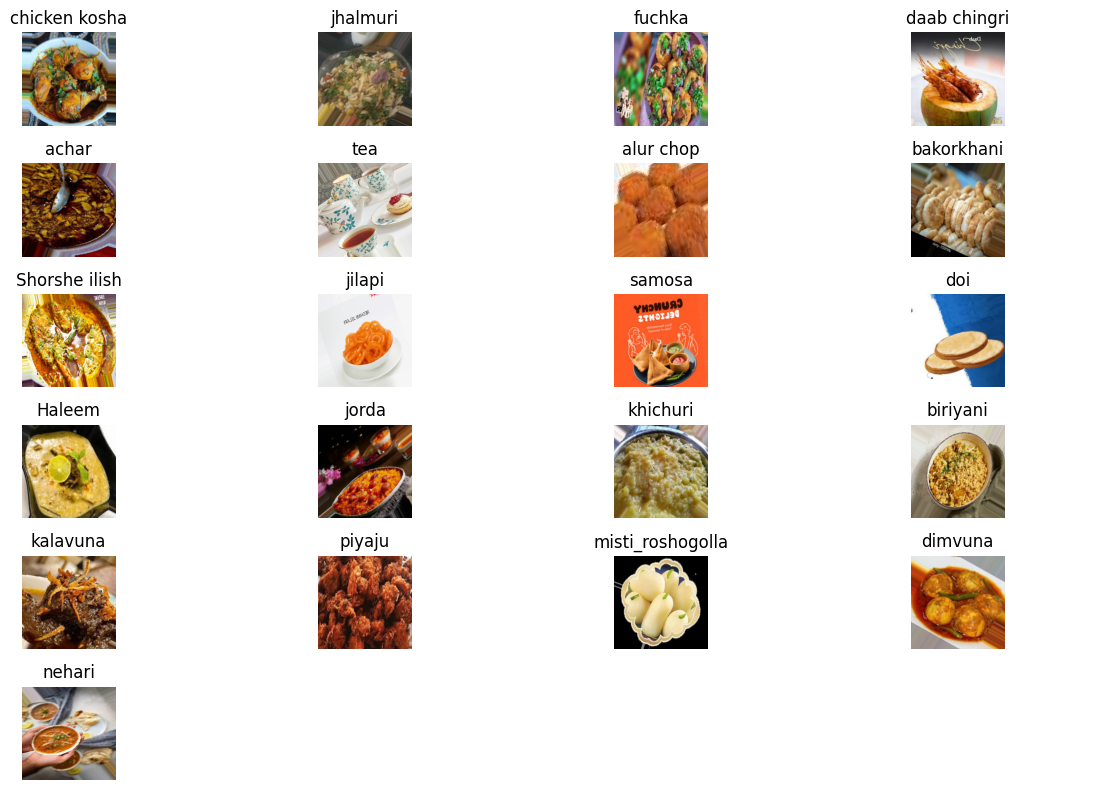

In [62]:
train_generator.reset()
imgs, labels = next(train_generator)  # Use next() to get the next batch

# Initialize list to store label names
label_names = []

# Get the indices of the labels that are '1' (indicating the class)
label_indices = [np.where(r == 1)[0][0] for r in labels]

# Loop through label indices and map to class names
for ind in label_indices:
    # Directly map the index to class name
    label_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(ind)]
    label_names.append(label_name)

print(label_names)




import matplotlib.pyplot as plt
import numpy as np

# Function to get one image per class
def get_one_sample_per_class(generator, class_indices):
    """
    Extracts one sample image per class from the generator.

    Parameters:
        generator: Data generator (e.g., ImageDataGenerator.flow).
        class_indices: Dictionary mapping class names to indices.

    Returns:
        imgs (list): List of images (numpy arrays).
        titles (list): Corresponding class labels.
    """
    class_seen = set()
    imgs = []
    titles = []

    for batch_x, batch_y in generator:
        batch_labels = np.argmax(batch_y, axis=1)  # Convert one-hot to class indices
        
        for i, label in enumerate(batch_labels):
            if label not in class_seen:
                imgs.append(batch_x[i])  # Store image
                titles.append(list(class_indices.keys())[list(class_indices.values()).index(label)])  # Store label
                class_seen.add(label)
                
            if len(class_seen) == len(class_indices):  # Stop when we have all classes
                return imgs, titles

# Get class labels from the generator
class_indices = train_generator.class_indices  # Mapping of class names to numeric labels

# Extract one image per class
imgs, titles = get_one_sample_per_class(train_generator, class_indices)

# Function to plot images
def plot_images(imgs, titles, max_num=21):
    """
    Plots images with their respective titles.

    Parameters:
        imgs (list or array): List of images (numpy arrays).
        titles (list): Corresponding class labels for each image.
        max_num (int): Maximum number of images to display.

    Returns:
        None (Displays the images)
    """
    num_images = min(len(imgs), max_num)
    cols = 4  # Set number of columns
    rows = (num_images // cols) + (num_images % cols > 0)  # Calculate rows dynamically

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i in range(num_images):
        img = np.squeeze(imgs[i])  # Ensure proper shape
        axes[i].imshow(img)
        axes[i].set_title(titles[i])
        axes[i].axis("off")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Plot the selected images
plot_images(imgs, titles, max_num=21)



In [63]:
# Now the labels should be of the correct shape (batch_size, num_classes)
def process(image, label):
    label = tf.cast(label, tf.int32)  # Ensure the label is of integer type
    label = tf.one_hot(label, depth=21)  # One-hot encode for 21 classes
    return image, label

# Apply the process function to train and validation datasets
train_ds = augmented_train_generator
test_ds = test_generator


In [64]:
# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Fit the model

history = model.fit(train_ds, epochs=20, validation_data=test_ds)

Epoch 1/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 403s 585ms/step - accuracy: 0.2247 - loss: 2.6371 - val_accuracy: 0.5074 - val_loss: 1.5984
Epoch 2/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 391s 572ms/step - accuracy: 0.5346 - loss: 1.5318 - val_accuracy: 0.6127 - val_loss: 1.2737
Epoch 3/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 390s 571ms/step - accuracy: 0.6252 - loss: 1.2269 - val_accuracy: 0.6408 - val_loss: 1.1709
Epoch 4/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 386s 566ms/step - accuracy: 0.6649 - loss: 1.0855 - val_accuracy: 0.6449 - val_loss: 1.1787
Epoch 5/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 390s 571ms/step - accuracy: 0.7093 - loss: 0.9513 - val_accuracy: 0.6630 - val_loss: 1.1251
Epoch 6/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 386s 566ms/step - accuracy: 0.7428 - loss: 0.8429 - val_accuracy: 0.6929 - val_loss: 1.0563
Epoch 7/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 379s 554ms/step - accuracy: 0.7668 - loss: 0.7672 - val_accuracy: 0.6925 - val_loss: 1.0863
Epoch 8/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 389s 570ms/step - accuracy: 0.7821 -

In [49]:
# Fit the model

#early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)


#history = model.fit(train_ds, epochs=20, validation_data=test_ds, callbacks=[early_stop, checkpoint])


Epoch 1/20
252/676 ━━━━━━━━━━━━━━━━━━━━ 4:28 632ms/step - accuracy: 0.0460 - loss: 3.0929

KeyboardInterrupt: 

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
y_true = np.concatenate([test_ds[i][1] for i in range(len(test_ds))])  # Extracts true labels
y_true = np.argmax(y_true, axis=1)  # Convert one-hot to class index

# Get predicted labels
y_pred_probs = model.predict(test_ds)  # Predict class probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class index


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step


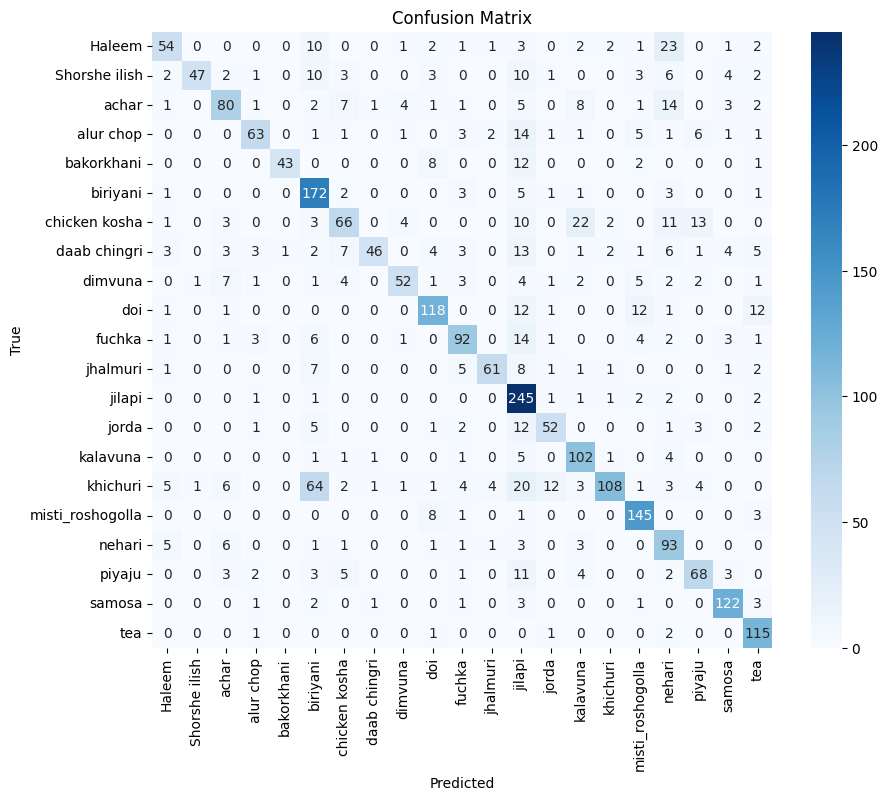

In [70]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_ds.class_indices.keys()),  
            yticklabels=list(test_ds.class_indices.keys()))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


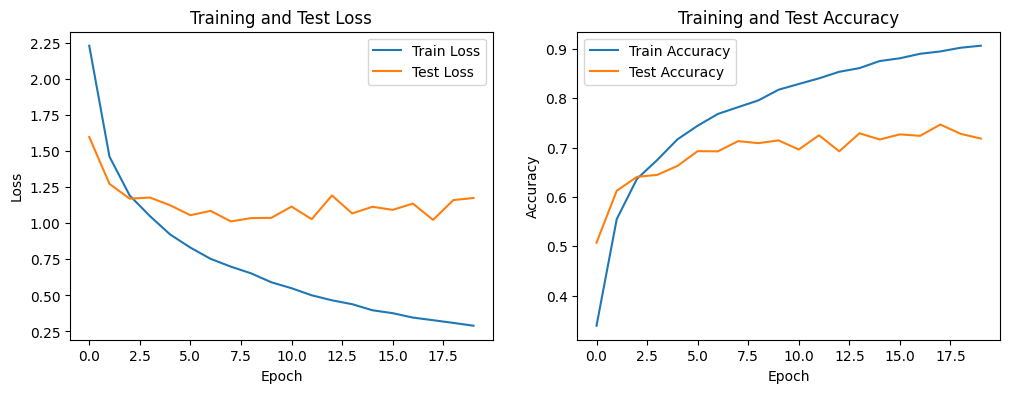

In [68]:
#for multiclass classification
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')

plt.show()

# Test 2: InceptionV3 [ valo na :( ]

https://www.kaggle.com/code/kmkarakaya/transfer-learning-for-image-classification

In [11]:
# Standard data science libraries
import psutil
import humanize
import os
from IPython.display import display_html

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
dataDirectory= "/kaggle/input/tbfc-21/TBFC_21" 
print(os.listdir(dataDirectory))

# Any results you write to the current directory are saved as output.  

['tbfc-splitted-7', 'tbfc-21']
['jilapi', 'achar', 'jorda', 'nehari', 'bakorkhani', 'doi', 'jhalmuri', 'daab chingri', 'alur chop', 'kalavuna', 'tea', 'Haleem', 'piyaju', 'biriyani', 'dimvuna', 'fuchka', 'misti_roshogolla', 'samosa', 'khichuri', 'Shorshe ilish', 'chicken kosha']


Dependicies

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Dense, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score, precision_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import time

%matplotlib inline


data split

In [3]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Set paths
original_dataset_dir = "/kaggle/input/tbfc-21/TBFC_21"  # Modify this to your dataset path
base_dir = "/kaggle/working/splitted_dataset"  # Temporary split dataset directory

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Function to split dataset
def split_dataset(original_dataset_dir, train_dir, validation_dir, split_ratio=0.8):
    """
    Splits the dataset into train and validation sets.
    :param original_dataset_dir: Path to the original dataset
    :param train_dir: Path to save training images
    :param validation_dir: Path to save validation images
    :param split_ratio: Percentage of images used for training
    """
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(validation_dir):
        os.makedirs(validation_dir)

    # Iterate over each class (sub-folder)
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, val_images = train_test_split(images, train_size=split_ratio, random_state=42)

            # Create class directories
            train_class_dir = os.path.join(train_dir, class_name)
            validation_class_dir = os.path.join(validation_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(validation_class_dir, exist_ok=True)

            # Move images to train and validation folders
            for img in train_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
            for img in val_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(validation_class_dir, img))

# Split the dataset
split_dataset(original_dataset_dir, train_dir, validation_dir, split_ratio=0.8)


In [13]:
train_path = '/kaggle/working/splitted_dataset/train'
test_path = '/kaggle/working/splitted_dataset/validation'

# Check the contents of train and test directories
print(os.listdir(train_path))
print(os.listdir(test_path))


['kalavuna', 'samosa', 'khichuri', 'Shorshe ilish', 'dimvuna', 'doi', 'biriyani', 'bakorkhani', 'piyaju', 'Haleem', 'fuchka', 'achar', 'jhalmuri', 'alur chop', 'jilapi', 'nehari', 'tea', 'jorda', 'chicken kosha', 'daab chingri', 'misti_roshogolla']
['kalavuna', 'samosa', 'khichuri', 'Shorshe ilish', 'dimvuna', 'doi', 'biriyani', 'bakorkhani', 'piyaju', 'Haleem', 'fuchka', 'achar', 'jhalmuri', 'alur chop', 'jilapi', 'nehari', 'tea', 'jorda', 'chicken kosha', 'daab chingri', 'misti_roshogolla']


In [14]:
# Get all class names (sub-folder names) from the train directory
train_classes = os.listdir(train_path)

# Select the first 6 classes as an example (or you can use any filtering criteria)
selected_classes = train_classes[:]

print(selected_classes)

['kalavuna', 'samosa', 'khichuri', 'Shorshe ilish', 'dimvuna', 'doi', 'biriyani', 'bakorkhani', 'piyaju', 'Haleem', 'fuchka', 'achar', 'jhalmuri', 'alur chop', 'jilapi', 'nehari', 'tea', 'jorda', 'chicken kosha', 'daab chingri', 'misti_roshogolla']


Augment

In [17]:
# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rotation_range=40,
    validation_split=0.2) # set validation split

# Augmentation for validation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from newly created train/validation directories
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    classes=selected_classes,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size=(224, 224),
    batch_size=batchSize,
    class_mode='categorical',
    classes=selected_classes,
    subset='validation') # set as validation data


test_generator = ImageDataGenerator().flow_from_directory(
    test_path, 
    target_size=(224,224), 
    classes=selected_classes,
    shuffle= False,
    batch_size = batchSize)# set as test data

Found 8648 images belonging to 21 classes.
Found 2152 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


Number of samples of each class in all data generators

In [18]:
print ("In train_generator ")
for cls in range(len (train_generator.class_indices)):
    print(selected_classes[cls],":\t",list(train_generator.classes).count(cls))
print ("") 

print ("In validation_generator ")
for cls in range(len (validation_generator.class_indices)):
    print(selected_classes[cls],":\t",list(validation_generator.classes).count(cls))
print ("") 

print ("In test_generator ")
for cls in range(len (test_generator.class_indices)):
    print(selected_classes[cls],":\t",list(test_generator.classes).count(cls))

In train_generator 
kalavuna :	 374
samosa :	 438
khichuri :	 772
Shorshe ilish :	 296
dimvuna :	 276
doi :	 506
biriyani :	 603
bakorkhani :	 206
piyaju :	 326
Haleem :	 324
fuchka :	 416
achar :	 417
jhalmuri :	 288
alur chop :	 317
jilapi :	 820
nehari :	 371
tea :	 384
jorda :	 251
chicken kosha :	 430
daab chingri :	 327
misti_roshogolla :	 506

In validation_generator 
kalavuna :	 93
samosa :	 109
khichuri :	 193
Shorshe ilish :	 73
dimvuna :	 69
doi :	 126
biriyani :	 150
bakorkhani :	 51
piyaju :	 81
Haleem :	 80
fuchka :	 104
achar :	 104
jhalmuri :	 71
alur chop :	 79
jilapi :	 205
nehari :	 92
tea :	 96
jorda :	 62
chicken kosha :	 107
daab chingri :	 81
misti_roshogolla :	 126

In test_generator 
kalavuna :	 116
samosa :	 134
khichuri :	 240
Shorshe ilish :	 94
dimvuna :	 87
doi :	 158
biriyani :	 189
bakorkhani :	 66
piyaju :	 102
Haleem :	 103
fuchka :	 129
achar :	 131
jhalmuri :	 88
alur chop :	 101
jilapi :	 256
nehari :	 115
tea :	 120
jorda :	 79
chicken kosha :	 135

Plot some train data

In [19]:
train_generator.reset()
imgs, labels = next(train_generator)  # Use next() to get the next batch

# Initialize list to store label names
label_names = []

# Get the indices of the labels that are '1' (indicating the class)
label_indices = [np.where(r == 1)[0][0] for r in labels]

# Loop through label indices and map to class names
for ind in label_indices:
    # Directly map the index to class name
    label_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(ind)]
    label_names.append(label_name)

print(label_names)


['biriyani', 'daab chingri', 'daab chingri', 'chicken kosha', 'achar', 'Shorshe ilish', 'biriyani', 'doi', 'jilapi', 'misti_roshogolla', 'samosa', 'samosa', 'fuchka', 'khichuri', 'piyaju', 'chicken kosha', 'samosa', 'tea', 'daab chingri', 'biriyani', 'biriyani', 'jilapi', 'biriyani', 'jilapi', 'dimvuna', 'achar', 'alur chop', 'doi', 'fuchka', 'chicken kosha', 'jilapi', 'jilapi']


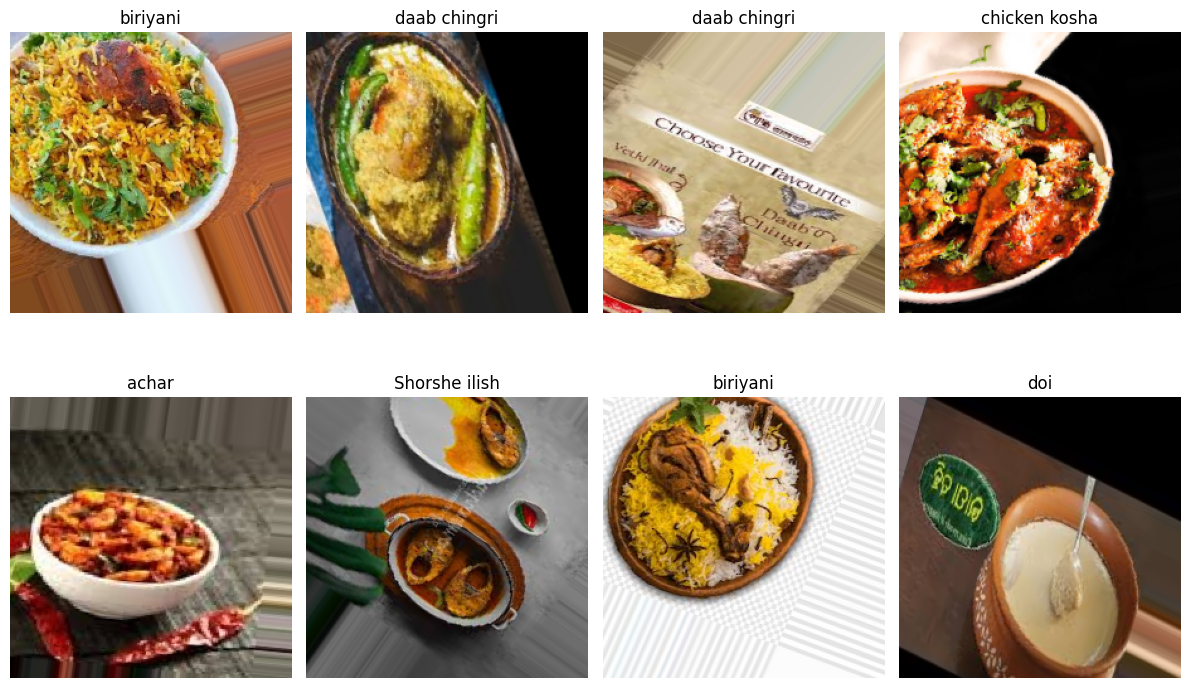

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images of each class
def plot_images(imgs, titles, max_num=8):
    """
    Plots images with their respective titles.

    Parameters:
        imgs (list or array): List of images (numpy arrays).
        titles (list): Corresponding class labels for each image.
        max_num (int): Maximum number of images to display.

    Returns:
        None (Displays the images)
    """
    num_images = min(len(imgs), max_num)
    cols = 4  # Set number of columns
    rows = (num_images // cols) + (num_images % cols > 0)  # Calculate rows dynamically

    fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
    axes = axes.flatten()

    for i in range(num_images):
        img = np.squeeze(imgs[i])  # Ensure proper shape
        axes[i].imshow(img)
        axes[i].set_title(titles[i])
        axes[i].axis("off")

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Now use the function to display images
plot_images(imgs, titles=label_names, max_num=8)


Create model by Transfer Learning from InceptionV3

In [21]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Load InceptionV3 base model without the top classification layer
base_model = InceptionV3(weights='imagenet', 
                          include_top=False, 
                          input_shape=(224, 224, 3))

base_model.trainable = False  # Freeze the base model to avoid retraining

# Adding the custom layers on top of InceptionV3
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
predictions = Dense(len(selected_classes), activation='softmax')(x)  # Output layer for multi-class classification

# Define the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Print the model summary
model.summary()


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 21,845,813 (83.34 MB)

 Trainable params: 43,029 (168.08 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Model name
modelName = "InceptionTutorial"

# Filepath to save the best weights with epoch and validation accuracy
filepath = f"checkpoints/{modelName}_weights-improvement-epoch-{{epoch:02d}}-val_acc-{{val_accuracy:.2f}}.keras"

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy',  # Use 'val_accuracy' for validation accuracy
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')  # 'max' mode to save the best validation accuracy

callbacks_list = [checkpoint]


In [23]:
model.compile(Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
stepsPerEpoch= (train_generator.samples+ (batchSize-1)) // batchSize
print("stepsPerEpoch: ", stepsPerEpoch)

validationSteps=(validation_generator.samples+ (batchSize-1)) // batchSize
print("validationSteps: ", validationSteps)


#validationSteps=(test_generator.samples+ (batchSize-1)) // batchSize
#print("validationSteps: ", validationSteps)

stepsPerEpoch:  271
validationSteps:  68


Train

In [26]:
# Reset the generators
train_generator.reset()
validation_generator.reset()

# Fit the model using the fit() method instead of fit_generator()
history = model.fit(
    train_generator, 
    validation_data=validation_generator,
    epochs=100,
    steps_per_epoch=stepsPerEpoch,
    validation_steps=validationSteps,
    #callbacks=callbacks_list,
    verbose=1
)


Epoch 1/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 128s 463ms/step - accuracy: 0.5004 - loss: 1.6798 - val_accuracy: 0.6050 - val_loss: 1.3371
Epoch 2/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 128s 463ms/step - accuracy: 0.5157 - loss: 1.6199 - val_accuracy: 0.5888 - val_loss: 1.3861
Epoch 4/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 87us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 133s 481ms/step - accuracy: 0.5168 - loss: 1.6138 - val_accuracy: 0.6083 - val_loss: 1.3577
Epoch 6/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 134s 483ms/step - accuracy: 0.5443 - loss: 1.5268 - val_accuracy: 0.6129 - val_loss: 1.2853
Epoch 8/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 0s 101us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
271/271 ━━━━━━━━━━━━━━━━━━━━ 135s 487ms/step - accuracy: 0.5366 - loss:

KeyboardInterrupt: 

In [28]:
import scipy
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split




#Data train test splitting 
# Set paths
original_dataset_dir = "/kaggle/input/tbfc-21/TBFC_21"  # Modify this to your dataset path
base_dir = "/kaggle/working/splitted_dataset"  # Temporary split dataset directory

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to split dataset
def split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8):
    """
    Splits the dataset into train and validation sets.
    :param original_dataset_dir: Path to the original dataset
    :param train_dir: Path to save training images
    :param validation_dir: Path to save validation images
    :param split_ratio: Percentage of images used for training
    """
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Iterate over each class (sub-folder)
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, test_images = train_test_split(images, train_size=split_ratio, random_state=42)

            # Create class directories
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Move images to train and validation folders
            for img in train_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
            for img in test_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Split the dataset
split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8)



# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rotation_range=40,
    validation_split=0.2) # set validation split

# Augmentation for validation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from newly created train/validation directories
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    classes=selected_classes,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(224, 224),
    batch_size=batchSize,
    class_mode='categorical',
    classes=selected_classes,
    subset='validation') # set as validation data

test_generator = ImageDataGenerator().flow_from_directory(
    test_dir, 
    target_size=(224,224), 
    classes=selected_classes,
    shuffle= False,
    batch_size = batchSize)# set as test data





Found 8648 images belonging to 21 classes.
Found 2152 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


# Test 3: VGG16 finetuned lr=1e-4 dropout=0.5

In [1]:
import scipy
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout


In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)
conv_base.summary()







58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [3]:

model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
#model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.3))
model.add(Dropout(0.5))
model.add(Dense(21,activation='softmax'))





In [4]:

#for data splitting 

# Set paths
original_dataset_dir = "/kaggle/input/tbfc-21/TBFC_21"  # Modify this to your dataset path
base_dir = "/kaggle/working/splitted_dataset"  # Temporary split dataset directory

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to split dataset
def split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8):
    """
    Splits the dataset into train and validation sets.
    :param original_dataset_dir: Path to the original dataset
    :param train_dir: Path to save training images
    :param validation_dir: Path to save validation images
    :param split_ratio: Percentage of images used for training
    """
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Iterate over each class (sub-folder)
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, test_images = train_test_split(images, train_size=split_ratio, random_state=42)

            # Create class directories
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Move images to train and validation folders
            for img in train_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
            for img in test_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Split the dataset
split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8)




In [5]:
#for data augmenting
# Custom function to add Gaussian noise
def add_gaussian_noise(img, mean=0, std=0.1):
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = np.clip(img + noise, 0, 1)  # Clip to ensure pixel values remain in [0, 1]
    return noisy_img

# Custom DataGenerator with Gaussian noise
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, generator, add_noise=False, multiply_times=3):
        self.generator = generator
        self.add_noise = add_noise
        self.multiply_times = multiply_times

    def __len__(self):
        return len(self.generator) * self.multiply_times

    def __getitem__(self, idx):
        batch_x, batch_y = self.generator[idx % len(self.generator)]
        if self.add_noise:
            batch_x = np.array([add_gaussian_noise(img) for img in batch_x])
        return batch_x, batch_y

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40
)

# Augmentation for validation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from newly created train/validation directories
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Wrap the train_generator with CustomDataGenerator to add Gaussian noise and multiply data
augmented_train_generator = CustomDataGenerator(
    generator=train_generator,
    add_noise=True,
    multiply_times=2  # Increase training data twofold
)


Found 10800 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


In [6]:
# Now the labels should be of the correct shape (batch_size, num_classes)
def process(image, label):
    label = tf.cast(label, tf.int32)  # Ensure the label is of integer type
    label = tf.one_hot(label, depth=21)  # One-hot encode for 21 classes
    return image, label

# Apply the process function to train and validation datasets
train_ds = augmented_train_generator
test_ds = test_generator


# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:

# Fit the model
history = model.fit(train_ds, epochs=20, validation_data=test_ds)




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


187/676 ━━━━━━━━━━━━━━━━━━━━ 4:50 593ms/step - accuracy: 0.0914 - loss: 3.1285

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


676/676 ━━━━━━━━━━━━━━━━━━━━ 414s 588ms/step - accuracy: 0.1779 - loss: 2.7957 - val_accuracy: 0.4597 - val_loss: 1.7346
Epoch 2/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 388s 567ms/step - accuracy: 0.4581 - loss: 1.7820 - val_accuracy: 0.5968 - val_loss: 1.3194
Epoch 3/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 388s 567ms/step - accuracy: 0.5713 - loss: 1.4198 - val_accuracy: 0.6327 - val_loss: 1.2149
Epoch 4/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 386s 565ms/step - accuracy: 0.6256 - loss: 1.2394 - val_accuracy: 0.6360 - val_loss: 1.1631
Epoch 5/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 385s 564ms/step - accuracy: 0.6650 - loss: 1.1107 - val_accuracy: 0.6504 - val_loss: 1.1283
Epoch 6/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 389s 570ms/step - accuracy: 0.6879 - loss: 1.0222 - val_accuracy: 0.6578 - val_loss: 1.1214
Epoch 7/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 387s 565ms/step - accuracy: 0.7219 - loss: 0.9155 - val_accuracy: 0.6715 - val_loss: 1.0958
Epoch 8/20
676/676 ━━━━━━━━━━━━━━━━━━━━ 387s 567ms/step - accuracy: 0.7410 - loss: 0.84

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step


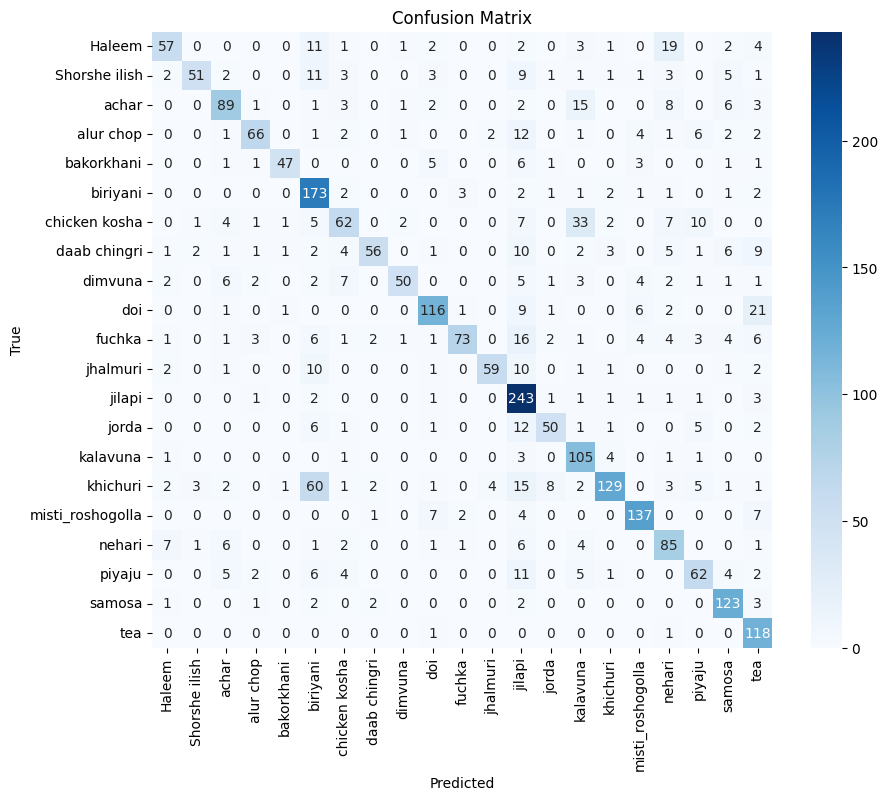

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
y_true = np.concatenate([test_ds[i][1] for i in range(len(test_ds))])  # Extracts true labels
y_true = np.argmax(y_true, axis=1)  # Convert one-hot to class index

# Get predicted labels
y_pred_probs = model.predict(test_ds)  # Predict class probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class index

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_ds.class_indices.keys()),  
            yticklabels=list(test_ds.class_indices.keys()))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


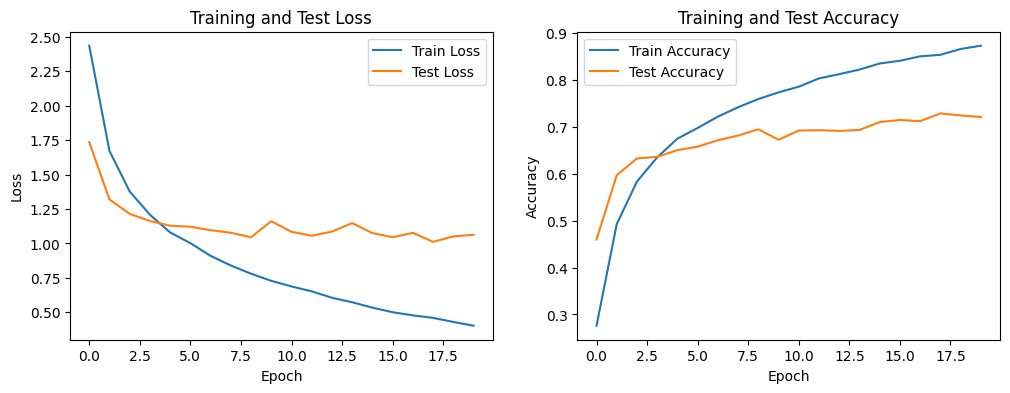

In [9]:
#for multiclass classification
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')

plt.show()

In [10]:
# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=list(test_ds.class_indices.keys()))

# Print the report
print("Classification Report:\n", class_report)


Classification Report:
                   precision    recall  f1-score   support

          Haleem       0.75      0.55      0.64       103
   Shorshe ilish       0.88      0.54      0.67        94
           achar       0.74      0.68      0.71       131
       alur chop       0.84      0.65      0.73       101
      bakorkhani       0.92      0.71      0.80        66
        biriyani       0.58      0.92      0.71       189
   chicken kosha       0.66      0.46      0.54       135
    daab chingri       0.89      0.53      0.67       105
         dimvuna       0.89      0.57      0.70        87
             doi       0.81      0.73      0.77       158
          fuchka       0.91      0.57      0.70       129
        jhalmuri       0.91      0.67      0.77        88
          jilapi       0.63      0.95      0.76       256
           jorda       0.76      0.63      0.69        79
        kalavuna       0.59      0.91      0.71       116
        khichuri       0.88      0.54      0.67

# Test 4: VGG16 lr=0.001

In [1]:
import scipy
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout


In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(224,224,3)
)

conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)
conv_base.summary()



model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
#model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.3))
model.add(Dropout(0.5))
model.add(Dense(21,activation='softmax'))








58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [3]:

#for data splitting 

# Set paths
original_dataset_dir = "/kaggle/input/tbfc-21/TBFC_21"  # Modify this to your dataset path
base_dir = "/kaggle/working/splitted_dataset"  # Temporary split dataset directory

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to split dataset
def split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8):
    """
    Splits the dataset into train and validation sets.
    :param original_dataset_dir: Path to the original dataset
    :param train_dir: Path to save training images
    :param validation_dir: Path to save validation images
    :param split_ratio: Percentage of images used for training
    """
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Iterate over each class (sub-folder)
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, test_images = train_test_split(images, train_size=split_ratio, random_state=42)

            # Create class directories
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Move images to train and validation folders
            for img in train_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
            for img in test_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Split the dataset
split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8)

#for data augmenting
# Custom function to add Gaussian noise
def add_gaussian_noise(img, mean=0, std=0.1):
    noise = np.random.normal(mean, std, img.shape)
    noisy_img = np.clip(img + noise, 0, 1)  # Clip to ensure pixel values remain in [0, 1]
    return noisy_img

# Custom DataGenerator with Gaussian noise
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, generator, add_noise=False, multiply_times=3):
        self.generator = generator
        self.add_noise = add_noise
        self.multiply_times = multiply_times

    def __len__(self):
        return len(self.generator) * self.multiply_times

    def __getitem__(self, idx):
        batch_x, batch_y = self.generator[idx % len(self.generator)]
        if self.add_noise:
            batch_x = np.array([add_gaussian_noise(img) for img in batch_x])
        return batch_x, batch_y

# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=40
)

# Augmentation for validation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from newly created train/validation directories
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Wrap the train_generator with CustomDataGenerator to add Gaussian noise and multiply data
augmented_train_generator = CustomDataGenerator(
    generator=train_generator,
    add_noise=True,
    multiply_times=3  # Increase training data twofold
)



Found 10800 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


In [4]:
# Now the labels should be of the correct shape (batch_size, num_classes)
def process(image, label):
    label = tf.cast(label, tf.int32)  # Ensure the label is of integer type
    label = tf.one_hot(label, depth=21)  # One-hot encode for 21 classes
    return image, label

# Apply the process function to train and validation datasets
train_ds = augmented_train_generator
test_ds = test_generator


# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = model.fit(train_ds, epochs=20, validation_data=test_ds)




Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 355/1014 ━━━━━━━━━━━━━━━━━━━━ 6:34 598ms/step - accuracy: 0.2456 - loss: 2.5813

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1014/1014 ━━━━━━━━━━━━━━━━━━━━ 623s 598ms/step - accuracy: 0.3765 - loss: 2.1158 - val_accuracy: 0.6559 - val_loss: 1.1603
Epoch 2/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 585s 573ms/step - accuracy: 0.7034 - loss: 1.0096 - val_accuracy: 0.7069 - val_loss: 1.0575
Epoch 3/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 591s 579ms/step - accuracy: 0.7794 - loss: 0.7446 - val_accuracy: 0.6752 - val_loss: 1.2903
Epoch 4/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 588s 576ms/step - accuracy: 0.8271 - loss: 0.5689 - val_accuracy: 0.6984 - val_loss: 1.3530
Epoch 5/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 572s 560ms/step - accuracy: 0.8605 - loss: 0.4511 - val_accuracy: 0.7077 - val_loss: 1.3574
Epoch 6/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 580s 568ms/step - accuracy: 0.8869 - loss: 0.3564 - val_accuracy: 0.7040 - val_loss: 1.3860
Epoch 7/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 580s 568ms/step - accuracy: 0.9076 - loss: 0.2950 - val_accuracy: 0.6970 - val_loss: 1.6676
Epoch 8/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 582s 570ms/step - accuracy: 0.9

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step


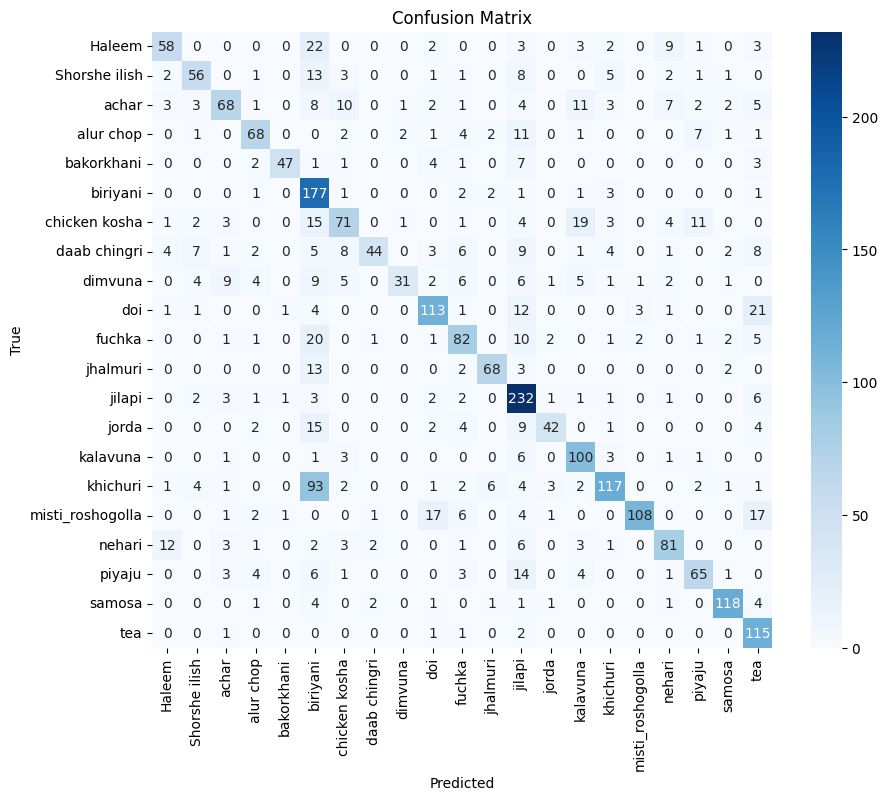

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels
y_true = np.concatenate([test_ds[i][1] for i in range(len(test_ds))])  # Extracts true labels
y_true = np.argmax(y_true, axis=1)  # Convert one-hot to class index

# Get predicted labels
y_pred_probs = model.predict(test_ds)  # Predict class probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class index

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_ds.class_indices.keys()),  
            yticklabels=list(test_ds.class_indices.keys()))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


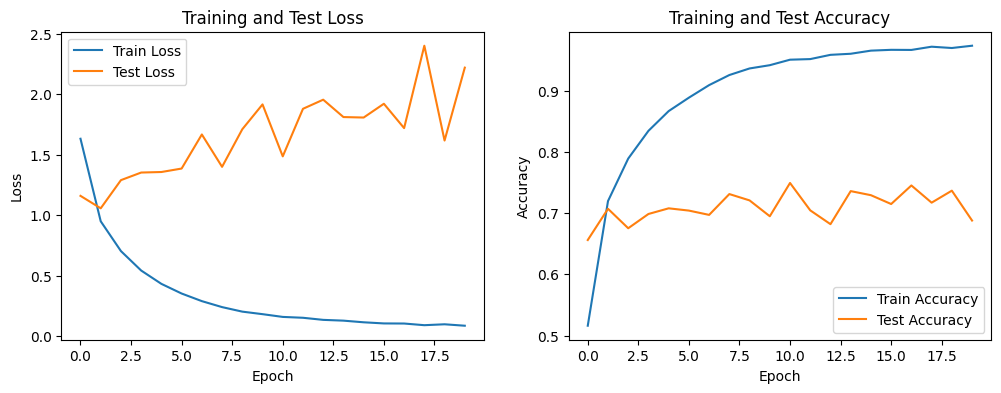

In [6]:
#for multiclass classification
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')

plt.show()

In [7]:
# Generate classification report
class_report = classification_report(y_true, y_pred, target_names=list(test_ds.class_indices.keys()))

# Print the report
print("Classification Report:\n", class_report)


Classification Report:
                   precision    recall  f1-score   support

          Haleem       0.71      0.56      0.63       103
   Shorshe ilish       0.70      0.60      0.64        94
           achar       0.72      0.52      0.60       131
       alur chop       0.75      0.67      0.71       101
      bakorkhani       0.94      0.71      0.81        66
        biriyani       0.43      0.94      0.59       189
   chicken kosha       0.65      0.53      0.58       135
    daab chingri       0.88      0.42      0.57       105
         dimvuna       0.89      0.36      0.51        87
             doi       0.74      0.72      0.73       158
          fuchka       0.65      0.64      0.64       129
        jhalmuri       0.86      0.77      0.81        88
          jilapi       0.65      0.91      0.76       256
           jorda       0.82      0.53      0.65        79
        kalavuna       0.66      0.86      0.75       116
        khichuri       0.81      0.49      0.61

# Test 5: Resnet50

https://www.kaggle.com/code/farzadnekouei/imbalanced-garbage-classification-resnet50#Step-1-%7C-Setup-and-Initialization

In [3]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, Add, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Model
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

import scipy
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [4]:

#for data splitting 

# Set paths
original_dataset_dir = "/kaggle/input/tbfc-21/TBFC_21"  # Modify this to your dataset path
base_dir = "/kaggle/working/splitted_dataset"  # Temporary split dataset directory

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to split dataset
def split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8):
    """
    Splits the dataset into train and validation sets.
    :param original_dataset_dir: Path to the original dataset
    :param train_dir: Path to save training images
    :param validation_dir: Path to save validation images
    :param split_ratio: Percentage of images used for training
    """
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Iterate over each class (sub-folder)
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, test_images = train_test_split(images, train_size=split_ratio, random_state=42)

            # Create class directories
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Move images to train and validation folders
            for img in train_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
            for img in test_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Split the dataset
split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8)





# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,

    rotation_range=45,                  # Randomly rotate the images by up to 45 degrees
    width_shift_range=0.15,             # Randomly shift images horizontally by up to 15% of the width
    height_shift_range=0.15,            # Randomly shift images vertically by up to 15% of the height
    horizontal_flip=True,               # Randomly flip images horizontally
    vertical_flip=True,                 # Randomly flip images vertically
    shear_range=0.05,                   # Apply slight shear transformations
    brightness_range=[0.9, 1.1],        # Vary brightness between 90% to 110% of original
    channel_shift_range=10,             # Randomly shift channels (can change colors of images slightly but less aggressively)
    fill_mode='nearest'                 # Fill in missing pixels using the nearest filled value
)




# Augmentation for validation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from newly created train/validation directories
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)




Found 10800 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


In [11]:
# Load the ResNet50 model with weights pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

fine tuning

In [12]:
for i, layer in enumerate(base_model.layers):
    if 140 <= i <= 150:
        print(i, layer.name)

140 conv4_block6_3_bn
141 conv4_block6_add
142 conv4_block6_out
143 conv5_block1_1_conv
144 conv5_block1_1_bn
145 conv5_block1_1_relu
146 conv5_block1_2_conv
147 conv5_block1_2_bn
148 conv5_block1_2_relu
149 conv5_block1_0_conv
150 conv5_block1_3_conv


In [13]:
# Freeze the layers up to conv4_block6_out
for layer in base_model.layers[:143]: # include the layer 142
    layer.trainable = False

In [14]:
# Create the new model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(21, activation='softmax')(x)

transfer_resnet50_model = Model(inputs=base_model.input, outputs=x)

# Compile the model
transfer_resnet50_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
transfer_resnet50_model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,630,741 (90.14 MB)

 Trainable params: 15,019,029 (57.29 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [ ]:
# Define the callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=15, restore_best_weights=True, verbose=1)



# Fit the model
history = transfer_resnet50_model.fit(train_ds, epochs=20, validation_data=test_ds)



Epoch 1/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 593s 570ms/step - accuracy: 0.3180 - loss: 2.1988 - val_accuracy: 0.1996 - val_loss: 3.1914
Epoch 2/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 581s 569ms/step - accuracy: 0.3584 - loss: 2.0742 - val_accuracy: 0.1973 - val_loss: 3.6229
Epoch 3/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 582s 569ms/step - accuracy: 0.3943 - loss: 1.9732 - val_accuracy: 0.2598 - val_loss: 3.0719
Epoch 4/20
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 586s 574ms/step - accuracy: 0.4234 - loss: 1.8567 - val_accuracy: 0.2483 - val_loss: 3.0508
Epoch 5/20
 625/1014 ━━━━━━━━━━━━━━━━━━━━ 3:38 563ms/step - accuracy: 0.4443 - loss: 1.7813

https://ieeexplore.ieee.org/document/10680523

Two-Stage Detector (like Faster R-CNN) and a One-Stage Detector (like YOLO)

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, Add, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Model
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

import scipy
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [3]:

#for data splitting 

# Set paths
original_dataset_dir = "/kaggle/input/tbfc-21/TBFC_21"  # Modify this to your dataset path
base_dir = "/kaggle/working/splitted_dataset"  # Temporary split dataset directory

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to split dataset
def split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8):
    """
    Splits the dataset into train and validation sets.
    :param original_dataset_dir: Path to the original dataset
    :param train_dir: Path to save training images
    :param validation_dir: Path to save validation images
    :param split_ratio: Percentage of images used for training
    """
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Iterate over each class (sub-folder)
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, test_images = train_test_split(images, train_size=split_ratio, random_state=42)

            # Create class directories
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Move images to train and validation folders
            for img in train_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
            for img in test_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Split the dataset
split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8)





# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,

    rotation_range=45,                  # Randomly rotate the images by up to 45 degrees
    width_shift_range=0.15,             # Randomly shift images horizontally by up to 15% of the width
    height_shift_range=0.15,            # Randomly shift images vertically by up to 15% of the height
    horizontal_flip=True,               # Randomly flip images horizontally
    vertical_flip=True,                 # Randomly flip images vertically
    shear_range=0.05,                   # Apply slight shear transformations
    brightness_range=[0.9, 1.1],        # Vary brightness between 90% to 110% of original
    channel_shift_range=10,             # Randomly shift channels (can change colors of images slightly but less aggressively)
    fill_mode='nearest'                 # Fill in missing pixels using the nearest filled value
)




# Augmentation for validation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from newly created train/validation directories
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)




Found 10800 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_two_stage_detector(input_shape, num_classes):
    # Backbone (ResNet50 with random initialization)
    backbone = tf.keras.applications.ResNet50(include_top=False, input_shape=input_shape, weights=None)  # No weights
    backbone.trainable = True  # Train the backbone from scratch

    # Region Proposal Network (RPN)
    rpn_conv = layers.Conv2D(512, (3, 3), padding='same', activation='relu')(backbone.output)
    rpn_cls = layers.Conv2D(9, (1, 1), activation='sigmoid', name='rpn_cls')(rpn_conv)  # 9 anchors per location
    rpn_reg = layers.Conv2D(9 * 4, (1, 1), activation='linear', name='rpn_reg')(rpn_conv)  # 4 coordinates per anchor

    # ROI Pooling (using TensorFlow's CropAndResize as a placeholder)
    def roi_pooling(x):
        # x[0]: feature map, x[1]: boxes, x[2]: box_indices
        return tf.image.crop_and_resize(x[0], x[1], x[2], (7, 7))

    # Define inputs for ROI Pooling
    feature_map = backbone.output
    boxes = layers.Input(shape=(None, 4), name='roi_boxes')  # ROI boxes
    box_indices = layers.Input(shape=(None,), dtype='int32', name='roi_box_indices')  # Box indices

    # Apply ROI Pooling with explicit output shape
    roi_pooled = layers.Lambda(
        roi_pooling,
        output_shape=(None, 7, 7, 2048),  # Explicit output shape
        name='roi_pooling'
    )([feature_map, boxes, box_indices])

    # Classifier Head
    x = layers.Flatten()(roi_pooled)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dense(1024, activation='relu')(x)
    cls_output = layers.Dense(num_classes, activation='softmax', name='cls_output')(x)  # Classification
    reg_output = layers.Dense(num_classes * 4, activation='linear', name='reg_output')(x)  # Bounding box regression

    # Model
    model = models.Model(
        inputs=[backbone.input, boxes, box_indices],  # Inputs: image, ROI boxes, and box indices
        outputs=[rpn_cls, rpn_reg, cls_output, reg_output]
    )
    return model

# Example usage
input_shape = (224, 224, 3)  # Input image shape
num_classes = 21  # Number of classes
model = create_two_stage_detector(input_shape, num_classes)

# Compile the model (custom loss functions are needed for RPN and ROI heads)
model.compile(optimizer='adam', loss={
    'rpn_cls': 'binary_crossentropy',
    'rpn_reg': 'mse',
    'cls_output': 'categorical_crossentropy',
    'reg_output': 'mse'
})

# Summary of the model
model.summary()

ValueError: Shapes used to initialize variables must be fully-defined (no `None` dimensions). Received: shape=(None, 1024) for variable path='dense/kernel'

In [8]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, Add, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Model
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix

import scipy
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [4]:

#for data splitting 

# Set paths
original_dataset_dir = "/kaggle/input/tbfc-21/TBFC_21"  # Modify this to your dataset path
base_dir = "/kaggle/working/splitted_dataset"  # Temporary split dataset directory

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Function to split dataset
def split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8):
    """
    Splits the dataset into train and validation sets.
    :param original_dataset_dir: Path to the original dataset
    :param train_dir: Path to save training images
    :param validation_dir: Path to save validation images
    :param split_ratio: Percentage of images used for training
    """
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Iterate over each class (sub-folder)
    for class_name in os.listdir(original_dataset_dir):
        class_path = os.path.join(original_dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = os.listdir(class_path)
            train_images, test_images = train_test_split(images, train_size=split_ratio, random_state=42)

            # Create class directories
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)

            # Move images to train and validation folders
            for img in train_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))
            for img in test_images:
                shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

# Split the dataset
split_dataset(original_dataset_dir, train_dir, test_dir, split_ratio=0.8)





Found 10800 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


In [26]:


# Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,

    rotation_range=45,                  # Randomly rotate the images by up to 45 degrees
    width_shift_range=0.15,             # Randomly shift images horizontally by up to 15% of the width
    height_shift_range=0.15,            # Randomly shift images vertically by up to 15% of the height
    horizontal_flip=True,               # Randomly flip images horizontally
    vertical_flip=True,                 # Randomly flip images vertically
    shear_range=0.05,                   # Apply slight shear transformations
    brightness_range=[0.9, 1.1],        # Vary brightness between 90% to 110% of original
    channel_shift_range=10,             # Randomly shift channels (can change colors of images slightly but less aggressively)
    fill_mode='nearest'                 # Fill in missing pixels using the nearest filled value
)




# Augmentation for validation (only rescale)
test_datagen = ImageDataGenerator(rescale=1./255)


# Flow from newly created train/validation directories
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10800 images belonging to 21 classes.
Found 2706 images belonging to 21 classes.


In [28]:
# Load ResNet as backbone
base_model = ResNet50(weights='/kaggle/input/resnet50-weight/tensorflow2/default/1/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze backbone layers

In [29]:
from tensorflow.keras import layers

# Feature Pyramid Network (FPN) Neck
x = base_model.output
x = layers.Conv2D(256, (1,1), activation='relu')(x)
x = layers.UpSampling2D(size=(2,2))(x)
x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)


In [30]:
# YOLO-style dense prediction head
x = layers.Conv2D(256, (3,3), activation='relu', padding='same')(x)
x = layers.Conv2D(21, (1,1), activation='softmax')(x)
x = layers.GlobalAveragePooling2D()(x)

In [31]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,702,336 (94.23 MB)

 Trainable params: 1,114,624 (4.25 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [32]:

from tensorflow.keras import models, layers


# Build model
model = models.Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Now the labels should be of the correct shape (batch_size, num_classes)
def process(image, label):
    label = tf.cast(label, tf.int32)  # Ensure the label is of integer type
    label = tf.one_hot(label, depth=21)  # One-hot encode for 21 classes
    return image, label

# Apply the process function to train and validation datasets
train_data = train_generator
test_data = test_generator


In [ ]:
# Compile model
model = models.Model(inputs=base_model.input, outputs=x)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = model.fit(train_data, epochs=20, validation_data=test_data)


Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 181s 497ms/step - accuracy: 0.1108 - loss: 2.9023 - val_accuracy: 0.1271 - val_loss: 2.8602
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 166s 481ms/step - accuracy: 0.1257 - loss: 2.8858 - val_accuracy: 0.1371 - val_loss: 2.8339
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 164s 476ms/step - accuracy: 0.1425 - loss: 2.8294 - val_accuracy: 0.1611 - val_loss: 2.7860
Epoch 4/20
123/338 ━━━━━━━━━━━━━━━━━━━━ 1:36 451ms/step - accuracy: 0.1501 - loss: 2.7989

In [22]:
def delete_invalid_files(directory):
    valid_extensions = {".jpg", ".jpeg", ".png", ".gif", ".bmp"}
    for root, _, files in os.walk(directory):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            if ext not in valid_extensions:
                os.remove(os.path.join(root, file))
                print(f"🗑 Deleted: {os.path.join(root, file)}")

# Run cleanup
delete_invalid_files("/kaggle/working/splitted_dataset/train")
delete_invalid_files("/kaggle/working/splitted_dataset/test")


In [25]:
def convert_to_jpeg(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                with Image.open(file_path) as img:
                    new_path = os.path.splitext(file_path)[0] + ".jpg"
                    img.convert("RGB").save(new_path, "JPEG")
                    os.remove(file_path)  # Delete old file
                    print(f"✅ Converted {file_path} to {new_path}")
            except Exception as e:
                print(f"❌ Error processing {file_path}: {e}")

# Convert images
convert_to_jpeg("/kaggle/working/splitted_dataset/test")
convert_to_jpeg("/kaggle/working/splitted_dataset/test")


✅ Converted /kaggle/working/splitted_dataset/test/jilapi/jilapi (724).jpg to /kaggle/working/splitted_dataset/test/jilapi/jilapi (724).jpg
✅ Converted /kaggle/working/splitted_dataset/test/jilapi/jilapi (306).jpg to /kaggle/working/splitted_dataset/test/jilapi/jilapi (306).jpg
✅ Converted /kaggle/working/splitted_dataset/test/jilapi/jilapi (706).jpg to /kaggle/working/splitted_dataset/test/jilapi/jilapi (706).jpg
✅ Converted /kaggle/working/splitted_dataset/test/jilapi/jilapi (1003).jpg to /kaggle/working/splitted_dataset/test/jilapi/jilapi (1003).jpg
✅ Converted /kaggle/working/splitted_dataset/test/jilapi/jilapi (1001).jpg to /kaggle/working/splitted_dataset/test/jilapi/jilapi (1001).jpg
✅ Converted /kaggle/working/splitted_dataset/test/jilapi/jilapi (510).jpg to /kaggle/working/splitted_dataset/test/jilapi/jilapi (510).jpg
✅ Converted /kaggle/working/splitted_dataset/test/jilapi/jilapi (1137).jpg to /kaggle/working/splitted_dataset/test/jilapi/jilapi (1137).jpg
✅ Converted /kaggle/w

# GLDICCNN Model:

In [1]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define paths
dataset_path = "/kaggle/input/tbfc-21/TBFC_21"  # Change this
output_dir = "/kaggle/working/"  # New dataset location

# Create output directories
for split in ["train", "val", "test"]:
    for class_name in os.listdir(dataset_path):
        os.makedirs(os.path.join(output_dir, split, class_name), exist_ok=True)

# Get all class names
classes = os.listdir(dataset_path)

# Split dataset for each class
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)
    
    # Shuffle images
    random.shuffle(images)
    
    # Split into train (80%) and test (20%)
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    
    # Further split train into train (80%) and validation (20%)
    train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=42)
    
    # Move files
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_dir, "train", class_name, img))
    
    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_dir, "val", class_name, img))
    
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_dir, "test", class_name, img))

print("Dataset split completed successfully!")


Dataset split completed successfully!


preprocess

In [26]:
# Augmentation for training

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")


# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# ✅ Augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Rotate images up to 30 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom into images
    horizontal_flip=True,  # Random horizontal flip
    fill_mode="nearest",  # Fill missing pixels
)

# ✅ No augmentation for validation and test sets (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Load train data with augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# ✅ Load validation data (no augmentation)
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# ✅ Load test data (no augmentation)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep the same order for evaluation
)

Found 8625 images belonging to 21 classes.
Found 2168 images belonging to 21 classes.
Found 2713 images belonging to 21 classes.


build cnn model

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout

# Define model
model = keras.Sequential([
    # Feature Extraction
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.BatchNormalization(),

    # Classification
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Corrected Dropout layer
    layers.Dense(21, activation='softmax')  # Assuming 21 classes
])

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 21)                  │           1,365 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 444,725 (1.70 MB)

 Trainable params: 444,469 (1.70 MB)

 Non-trainable params: 256 (1.00 KB)

In [21]:
history = model.fit(train_generator, validation_data=val_generator, epochs=20)


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 113s 393ms/step - accuracy: 0.1136 - loss: 2.9492 - val_accuracy: 0.0434 - val_loss: 3.0230
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 107s 388ms/step - accuracy: 0.1911 - loss: 2.6698 - val_accuracy: 0.1757 - val_loss: 2.7192
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 107s 386ms/step - accuracy: 0.2121 - loss: 2.5902 - val_accuracy: 0.1882 - val_loss: 2.7218
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 107s 387ms/step - accuracy: 0.2353 - loss: 2.5053 - val_accuracy: 0.2057 - val_loss: 2.8303
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 106s 384ms/step - accuracy: 0.2319 - loss: 2.4762 - val_accuracy: 0.2071 - val_loss: 2.6973
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 106s 381ms/step - accuracy: 0.2487 - loss: 2.4219 - val_accuracy: 0.2652 - val_loss: 2.3036
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 107s 387ms/step - accuracy: 0.2855 - loss: 2.3416 - val_accuracy: 0.1070 - val_loss: 5.6290
Epoch 8/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 108s 390ms/step - accuracy: 0.2853 -

KeyboardInterrupt: 

# Depthwise CNN with squeeze and excitation integration and residual skip connections


In [32]:
# Augmentation for training

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
test_dir = os.path.join(output_dir, "test")


# Define image size and batch size
img_size = (224, 224)
batch_size = 16

# ✅ Augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Rotate images up to 30 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Zoom into images
    horizontal_flip=True,  # Random horizontal flip
    fill_mode="nearest",  # Fill missing pixels
)

# ✅ No augmentation for validation and test sets (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# ✅ Load train data with augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# ✅ Load validation data (no augmentation)
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# ✅ Load test data (no augmentation)
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Keep the same order for evaluation
)

Found 8625 images belonging to 21 classes.
Found 2168 images belonging to 21 classes.
Found 2713 images belonging to 21 classes.


In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization, Activation, Dropout, Add, Input, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Reshape


def depthwise_separable_conv(x, filters, kernel_size, strides=1):
    x = DepthwiseConv2D(kernel_size, strides=strides, padding='same', depth_multiplier=1)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Conv2D(filters, (1,1), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    return x

def se_block(input_tensor, ratio=16):
    filters = input_tensor.shape[-1]
    squeeze = GlobalAveragePooling2D()(input_tensor)
    excitation = Dense(filters // ratio, activation='relu')(squeeze)
    excitation = Dense(filters, activation='sigmoid')(excitation)
    excitation = Reshape((1, 1, filters))(excitation)  # FIX: Use Reshape layer
    return Multiply()([input_tensor, excitation])


def residual_block(x, filters):
    res = depthwise_separable_conv(x, filters, (3,3))
    res = depthwise_separable_conv(res, filters, (3,3))
    x = Conv2D(filters, (1,1), padding='same')(x)  # Match dimensions
    x = Add()([x, res])  # Skip Connection
    return x

def build_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = depthwise_separable_conv(inputs, 32, (3,3))
    x = residual_block(x, 64)
    x = se_block(x)
    
    x = residual_block(x, 128)
    x = se_block(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='swish')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(21, activation='softmax')(x)

    return Model(inputs, outputs)

model = build_model((224, 224, 3), 10)
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_16       │ (None, 224, 224, 3)    │             30 │ input_layer_10[0][0]   │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_39    │ (None, 224, 224, 3)    │             12 │ depthwise_conv2d_16[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_32             │ (None, 224, 224, 3)    │              0 │ batch_normalization_3… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 224, 224, 32)   │            128 │ activation_32[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_40    │ (None, 224, 224, 32)   │            128 │ conv2d_64[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_33             │ (None, 224, 224, 32)   │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_17       │ (None, 224, 224, 32)   │            320 │ activation_33[0][0]    │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_41    │ (None, 224, 224, 32)   │            128 │ depthwise_conv2d_17[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_34             │ (None, 224, 224, 32)   │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 224, 224, 64)   │          2,112 │ activation_34[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_42    │ (None, 224, 224, 64)   │            256 │ conv2d_65[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_35             │ (None, 224, 224, 64)   │              0 │ batch_normalization_4… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ depthwise_conv2d_18       │ (None, 224, 224, 64)   │            640 │ activation_35[0][0]    │
│ (DepthwiseConv2D)    

 Total params: 69,387 (271.04 KB)

 Trainable params: 67,973 (265.52 KB)

 Non-trainable params: 1,414 (5.52 KB)

In [34]:
# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [35]:
history = model.fit(train_generator, validation_data=val_generator, epochs=20)

Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 150s 235ms/step - accuracy: 0.0862 - loss: 2.9984 - val_accuracy: 0.1305 - val_loss: 2.9597
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 118s 216ms/step - accuracy: 0.1832 - loss: 2.8062 - val_accuracy: 0.2302 - val_loss: 2.6359
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 118s 216ms/step - accuracy: 0.2303 - loss: 2.6253 - val_accuracy: 0.2348 - val_loss: 2.6059
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 118s 215ms/step - accuracy: 0.2512 - loss: 2.4956 - val_accuracy: 0.2477 - val_loss: 2.4824
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 119s 218ms/step - accuracy: 0.2455 - loss: 2.4459 - val_accuracy: 0.2675 - val_loss: 2.4359
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 118s 216ms/step - accuracy: 0.2746 - loss: 2.3915 - val_accuracy: 0.2620 - val_loss: 2.4099
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 118s 216ms/step - accuracy: 0.2715 - loss: 2.3558 - val_accuracy: 0.2929 - val_loss: 2.3070
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 118s 216ms/step - accuracy: 0.2854 -